In [3]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing



In [4]:
df = pd.read_csv("D:Courses/Projects/exchange_rate_to_usd.csv",index_col=0)

# Print the head of df
print(df.head())

# Print the info of df
print(df.info())

# Print the shape of df
print(df.shape)

            chinese_yuan_to_usd  euro_to_usd  japanese_yen_to_usd  \
date                                                                
2004-01-02                  NaN       1.2592                  NaN   
2004-01-05             0.120817       1.2657             0.009355   
2004-01-06             0.120815       1.2756             0.009412   
2004-01-07             0.120814       1.2679             0.009413   
2004-01-08             0.120814       1.2634             0.009421   

            uk_pound_to_usd  us_dollar_to_usd  algerian_dinar_to_usd  \
date                                                                   
2004-01-02           1.7858               1.0                    NaN   
2004-01-05           1.7996               1.0                    NaN   
2004-01-06           1.8209               1.0                    NaN   
2004-01-07           1.8140               1.0                    NaN   
2004-01-08           1.8122               1.0                    NaN   

           

As we can see in the following chunk of code, the dataset contains 51 exchange rates from all across the world. There is data since january of 2004, but there are some NaN values for some exchange rates. The dataframe contains 4588 rows (each one representing one date) and 52 columns (The first one represents the Date and each one the remaining columns represents an exhange rate to the US dollar.

# Plots of the time series, to see their dynamics

It is possible to see from the estimated mean that since 2004 some currencies have had losses and some other gains in their value. We should be careful because somo exhnage rates mean: How many units of the currency are necessary to buy one US dollar (as the euro_usd exchange rate) and some others mean: How many US dollars are necessary to buy one unit of the currency(as it is the case with the Colombian Peso). Particularly the EURUSD exhange rate has a positive daily variation mean, then it has lost value against the dollar, and the colombian peso has lost value against the US dollar because the daily percentage variation change is also positive. Now let´s see the daily percentage variation plots.

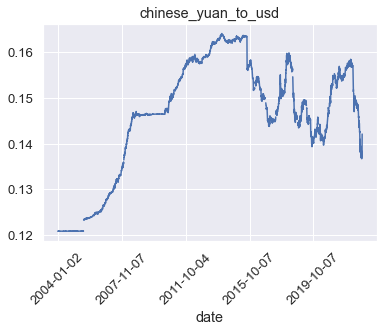

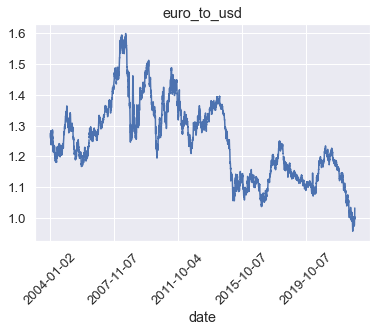

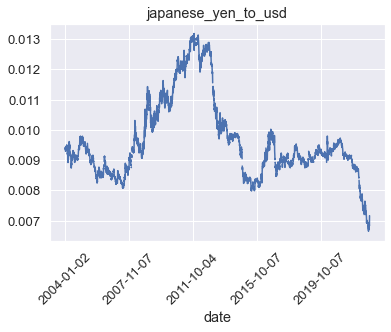

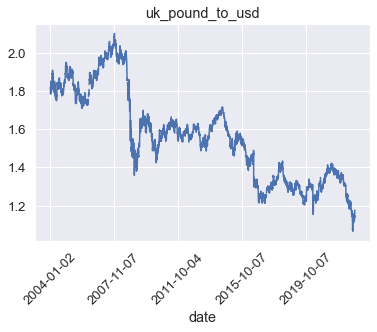

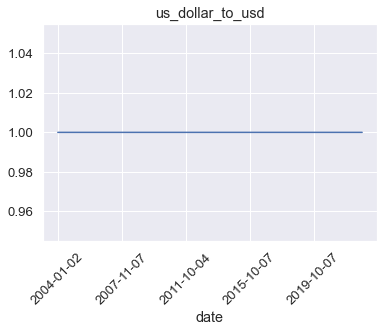

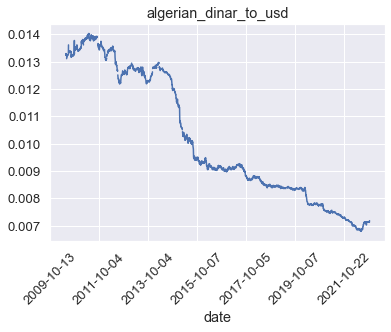

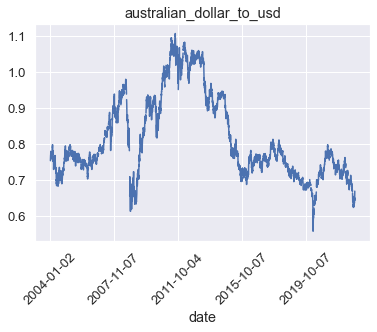

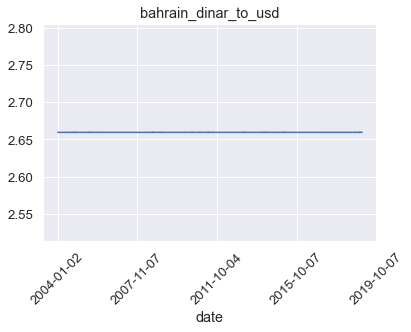

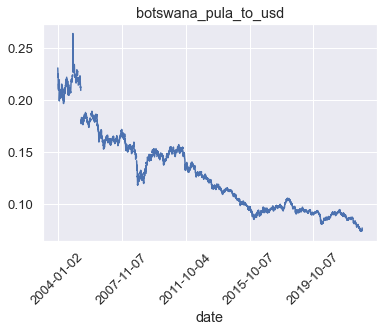

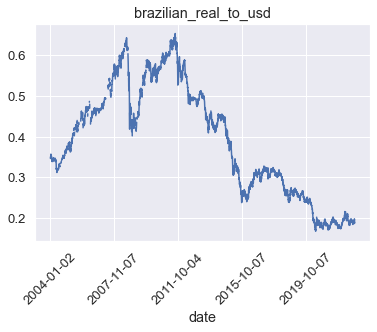

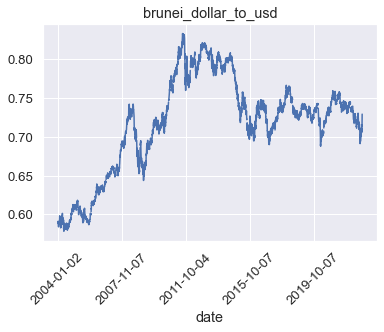

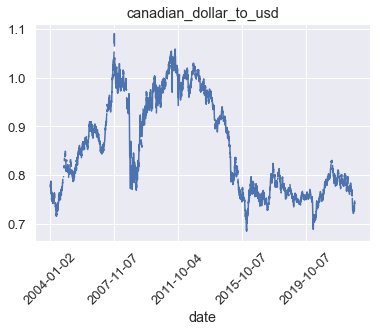

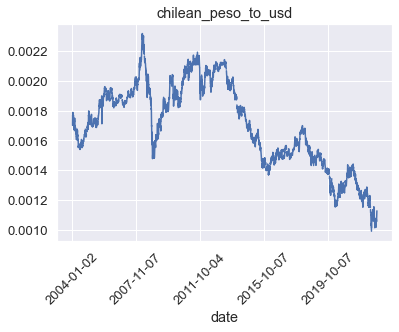

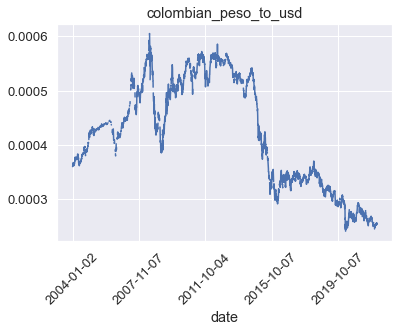

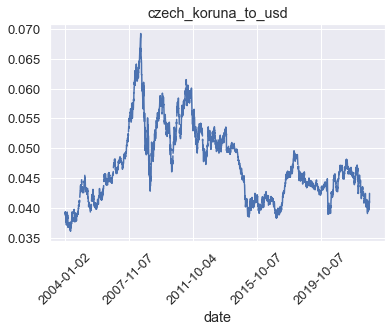

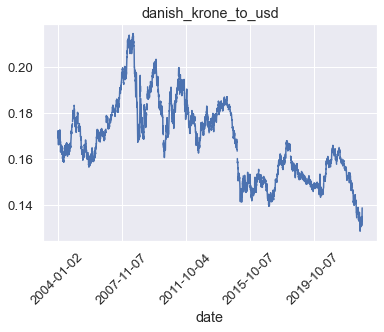

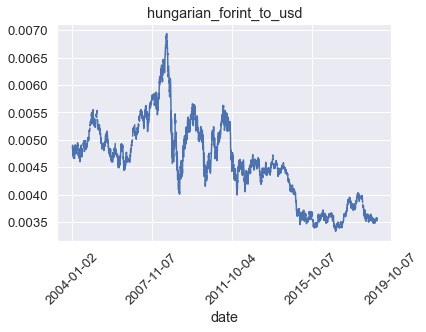

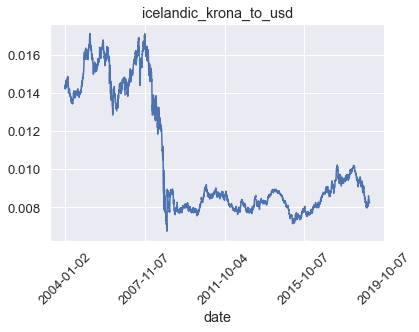

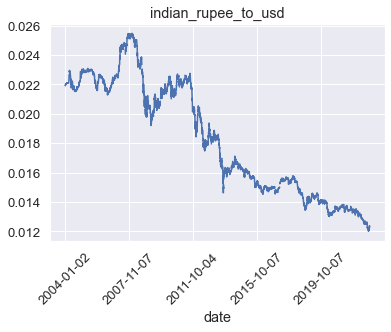

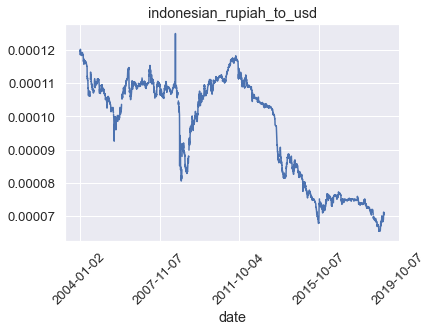

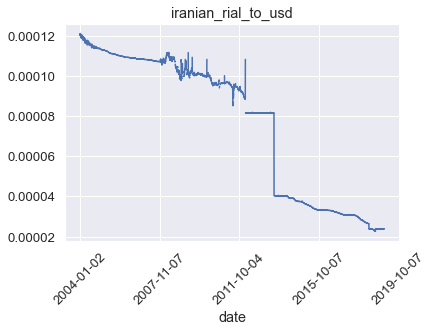

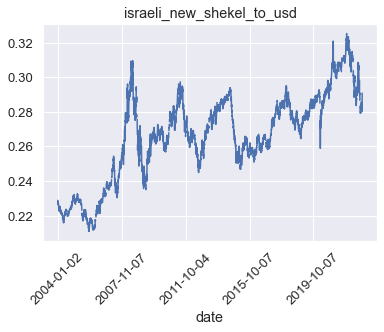

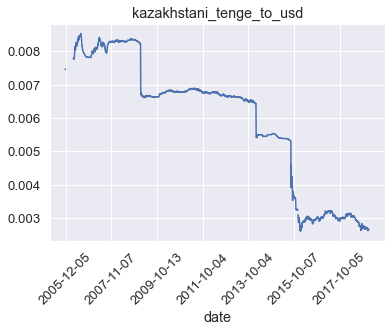

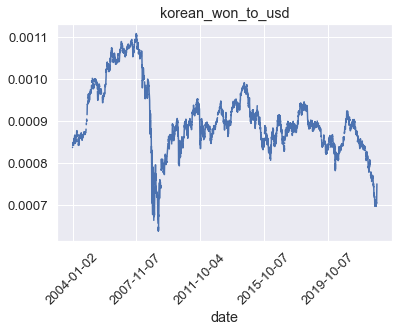

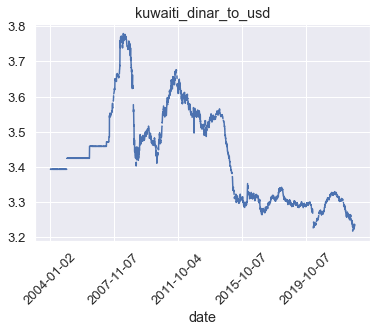

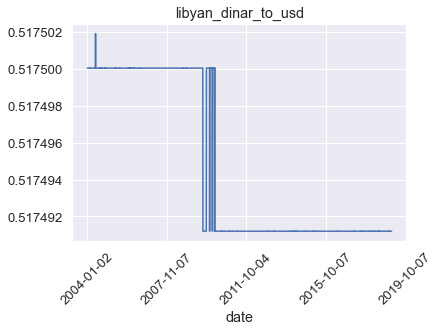

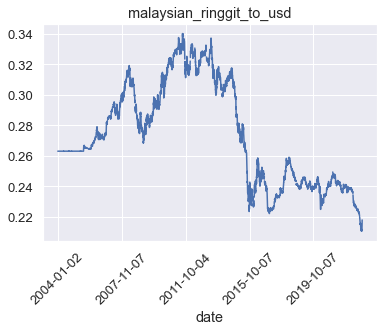

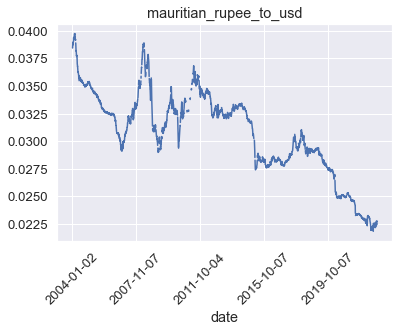

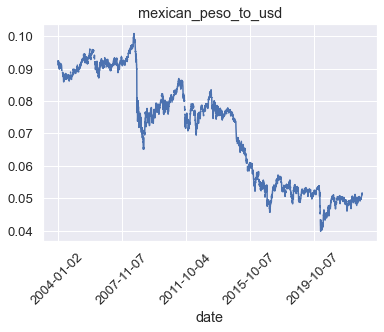

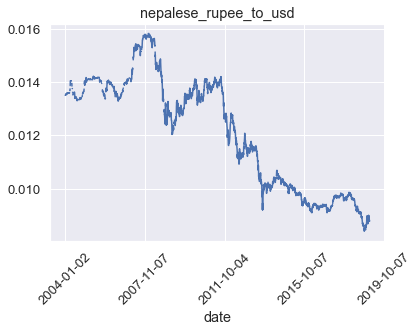

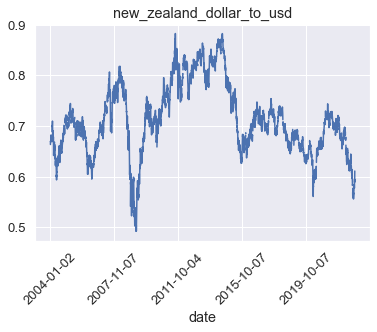

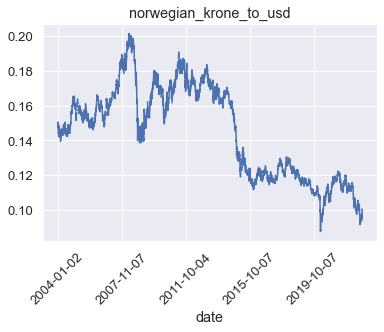

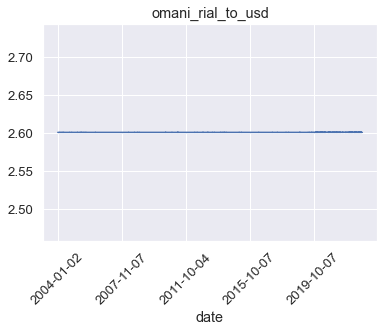

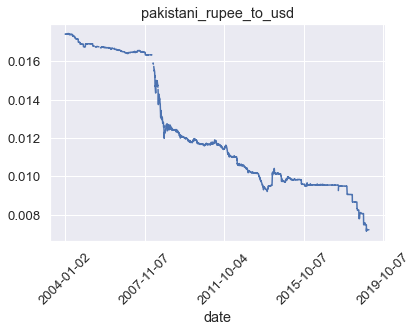

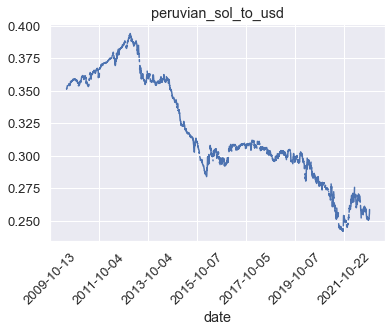

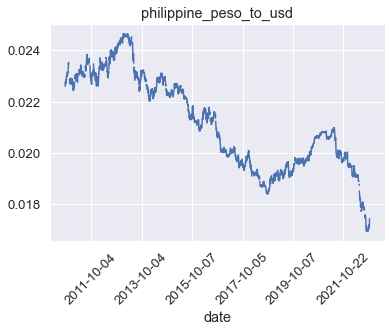

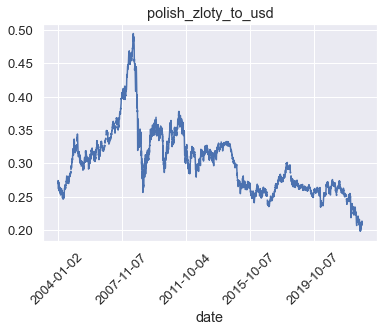

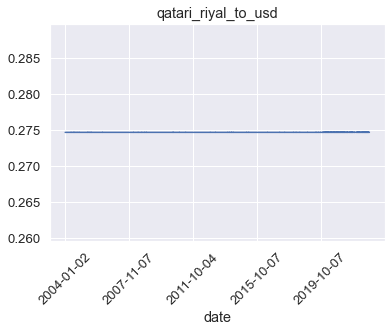

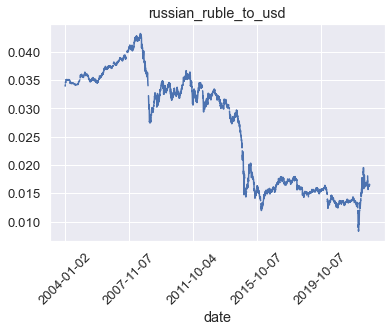

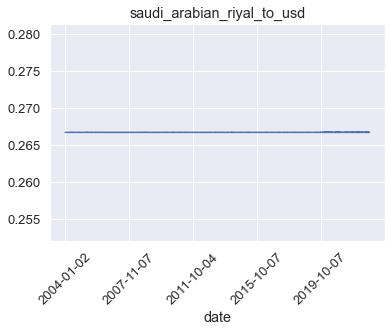

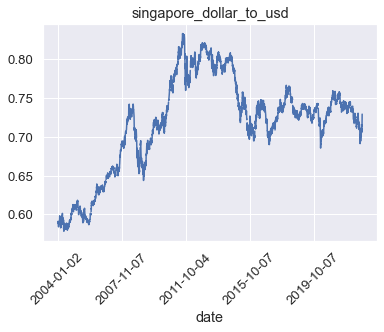

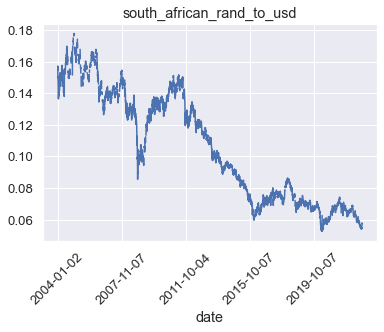

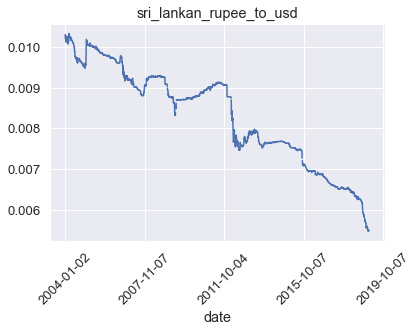

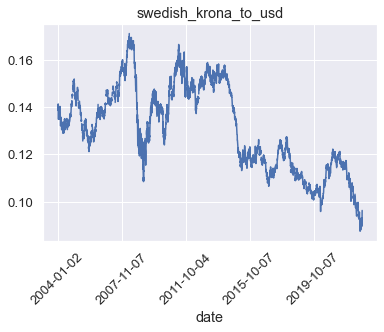

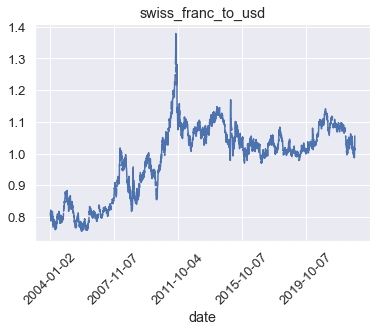

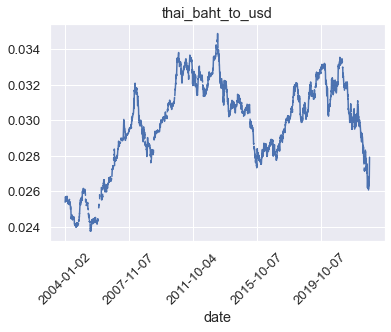

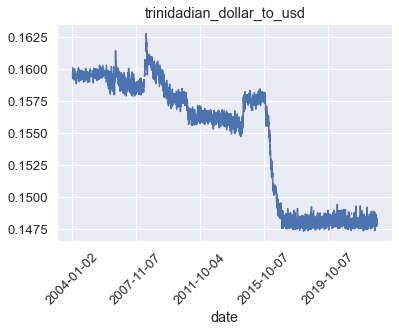

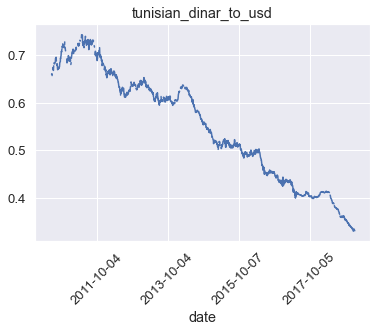

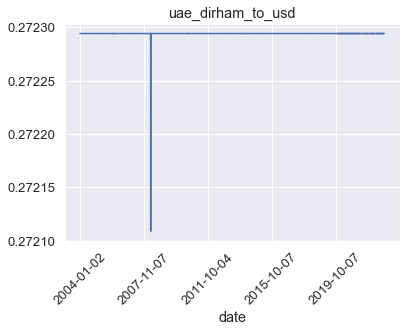

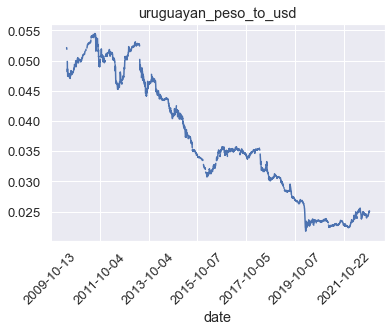

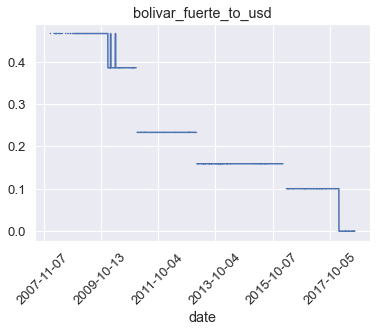

In [5]:
sns.set(font_scale=1.2)
for i in range(len(df.columns)):
    ex_rate=df.iloc[:,i]
    ex_rate.plot(title=df.columns[i])
    #Rotate xticks (Dates) 45 degrees
    plt.xticks(rotation=45)
    plt.show()

Now, let´s see the descriptive statistics for the daily percentage change of each exchange rate. We will see these statistics for the daily percentage variation, because it could be also seen as a devaluation indicator, and because usually the exchange rates are not stationary, therefore the mean particularly is not constant over time. It is important to note that the variance (and therefore the standard deviation) is not constant over time neither, therefore the standar deviation calculated by the describe() method is probably not a good estimator of the actual standard deviation of the series

In [6]:
df.pct_change(1).describe()

,chinese_yuan_to_usd,euro_to_usd,japanese_yen_to_usd,uk_pound_to_usd,us_dollar_to_usd,algerian_dinar_to_usd,australian_dollar_to_usd,bahrain_dinar_to_usd,botswana_pula_to_usd,brazilian_real_to_usd,...,south_african_rand_to_usd,sri_lankan_rupee_to_usd,swedish_krona_to_usd,swiss_franc_to_usd,thai_baht_to_usd,trinidadian_dollar_to_usd,tunisian_dinar_to_usd,uae_dirham_to_usd,uruguayan_peso_to_usd,bolivar_fuerte_to_usd
count,4760.000000,4761.000000,4760.000000,4761.000000,4761.0,3110.000000,4761.000000,4761.0,4760.000000,4761.000000,...,4761.000000,4761.000000,4761.000000,4760.000000,4760.000000,4759.000000,3090.000000,4.761000e+03,3114.000000,3701.000000
mean,0.000036,-0.000025,-0.000037,-0.000068,0.0,-0.000196,0.000007,0.0,-0.000201,-0.000082,...,-0.000131,-0.000128,-0.000047,0.000078,0.000025,-0.000014,-0.000218,9.726637e-11,-0.000223,-0.001386
std,0.001737,0.005789,0.006220,0.006210,0.0,0.002595,0.007983,0.0,0.007670,0.009559,...,0.011795,0.001774,0.007706,0.006780,0.003114,0.002202,0.003515,1.394897e-05,0.004725,0.026922
min,-0.018235,-0.046251,-0.042172,-0.079842,0.0,-0.035401,-0.096489,0.0,-0.132697,-0.085340,...,-0.142533,-0.030710,-0.049669,-0.080476,-0.024930,-0.011374,-0.033383,-6.802721e-04,-0.042424,-0.997010
25%,-0.000382,-0.003100,-0.003257,-0.003345,0.0,-0.001184,-0.003979,0.0,-0.003481,-0.004098,...,-0.005477,-0.000229,-0.003985,-0.003112,-0.001410,-0.001320,-0.000961,0.000000e+00,-0.001815,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,0.000486,0.003103,0.003003,0.003354,0.0,0.000929,0.004358,0.0,0.003411,0.004268,...,0.005722,0.000055,0.004022,0.003258,0.001467,0.001090,0.000384,0.000000e+00,0.001684,0.000000
max,0.020568,0.041203,0.050188,0.042012,0.0,0.032816,0.074184,0.0,0.153141,0.096561,...,0.185975,0.020556,0.047779,0.167314,0.033489,0.010166,0.044717,6.807352e-04,0.026944,0.209316


It is possible to see from the estimated mean that since 2004 some currencies have had losses and some other gains in their value. We should be careful because somo exhnage rates mean: How many units of the currency are necessary to buy one US dollar (as the euro_usd exchange rate) and some others mean: How many US dollars are necessary to buy one unit of the currency(as it is the case with the Colombian Peso). Particularly the EURUSD exhange rate has a positive daily variation mean, then it has lost value against the dollar, and the colombian peso has lost value against the US dollar because the daily percentage variation change is also positive. Now let´s see the daily percentage variation plots.

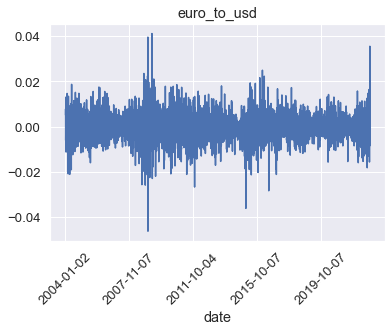

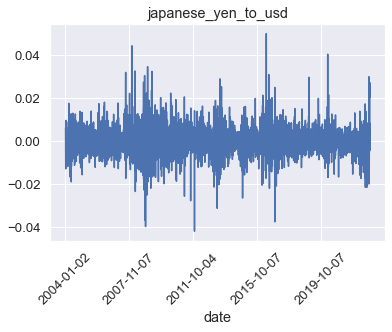

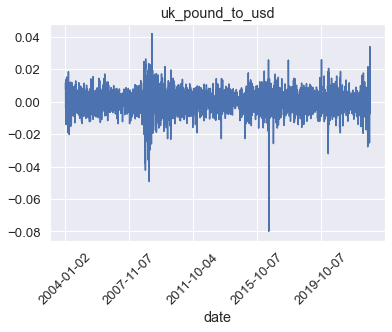

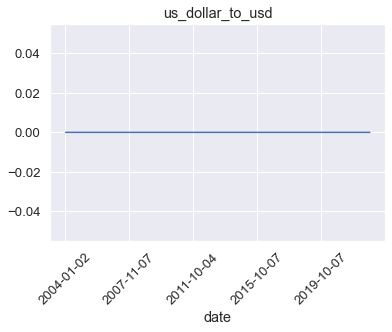

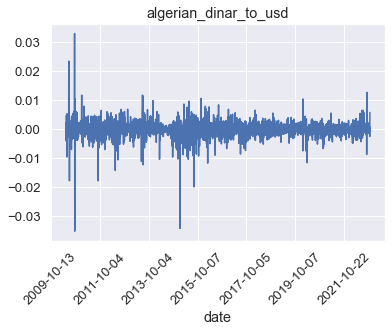

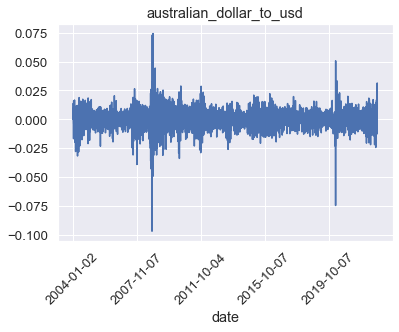

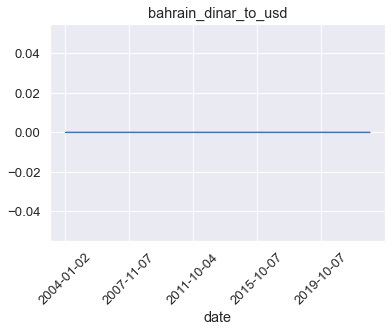

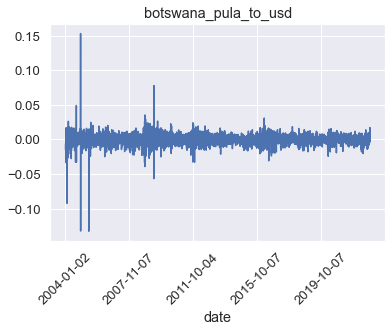

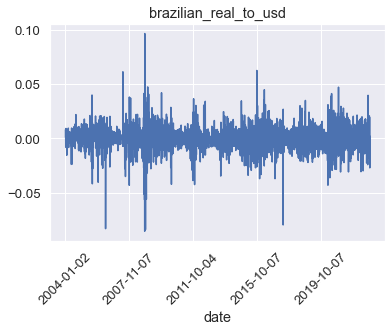

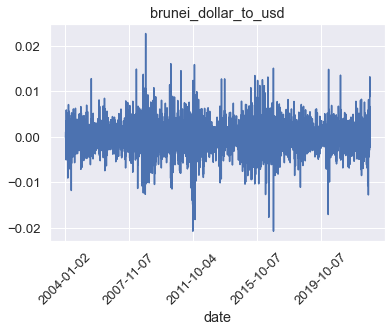

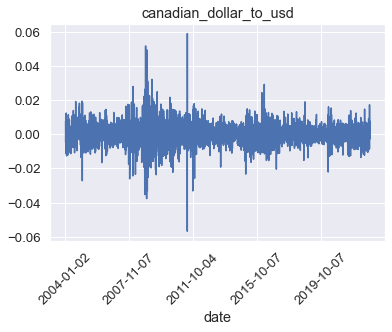

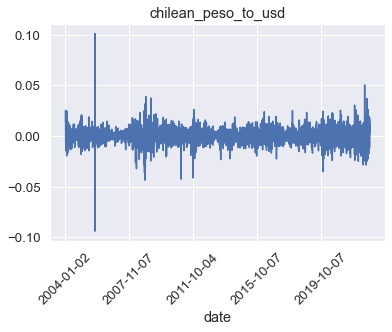

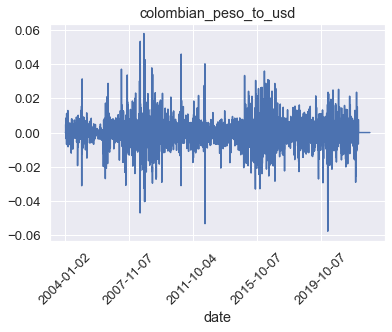

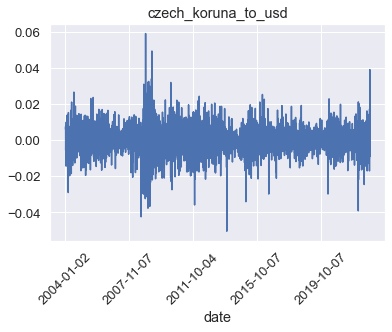

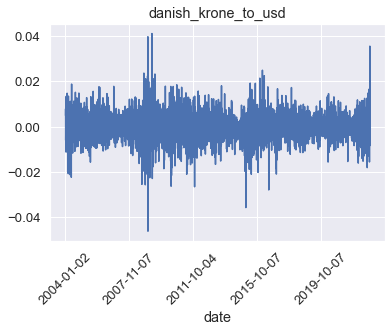

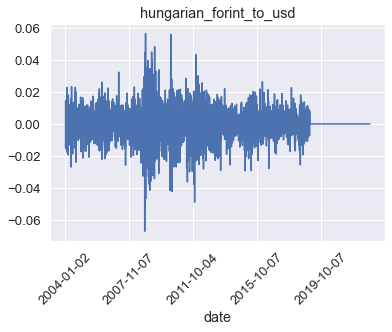

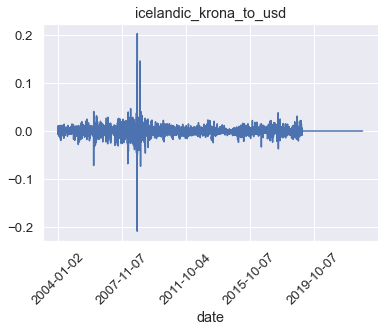

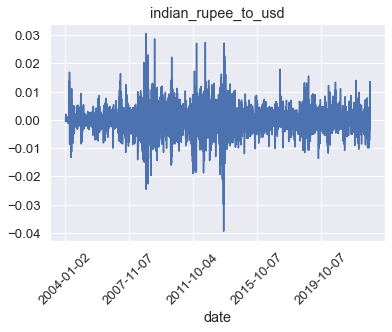

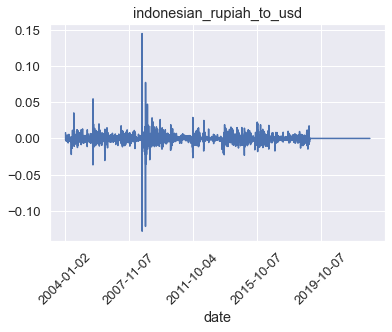

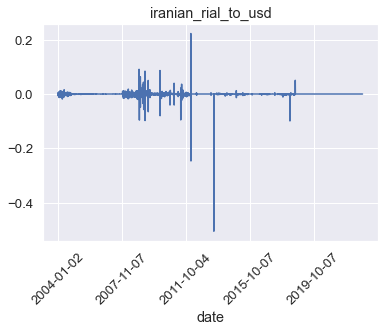

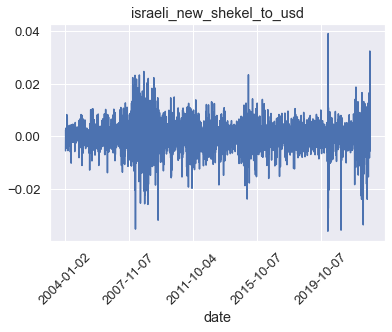

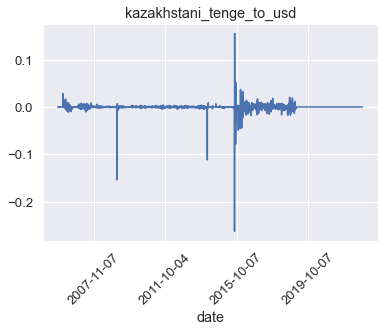

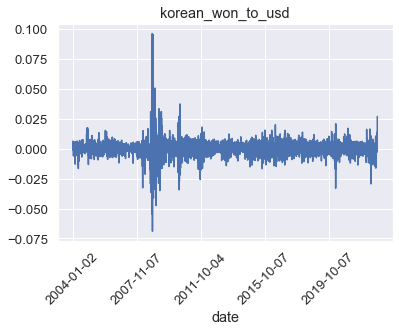

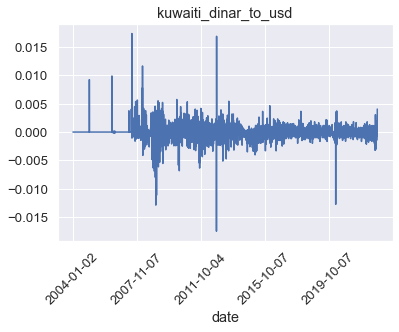

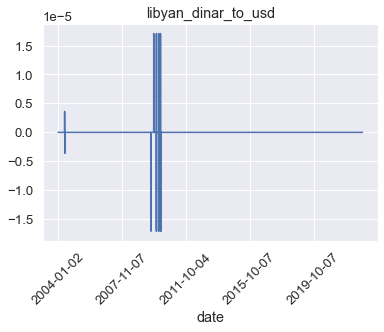

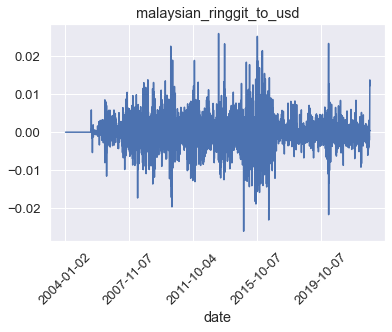

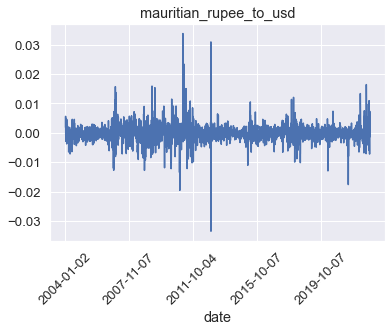

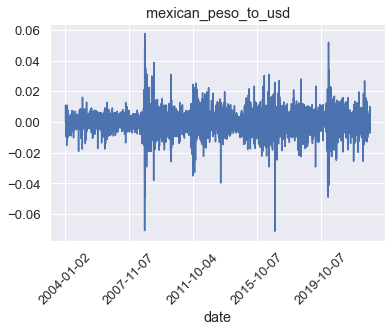

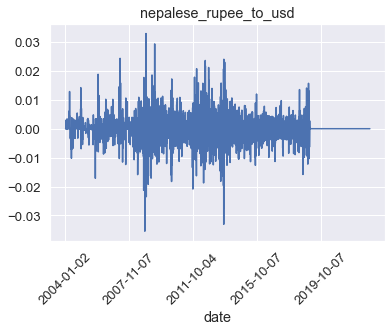

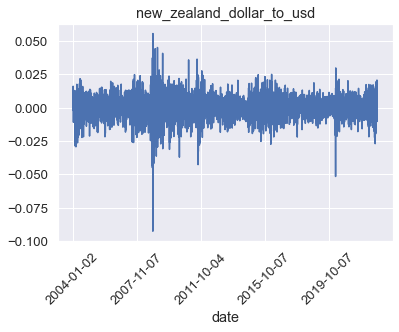

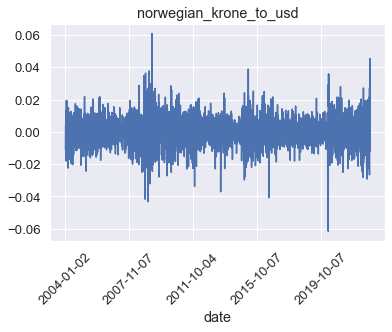

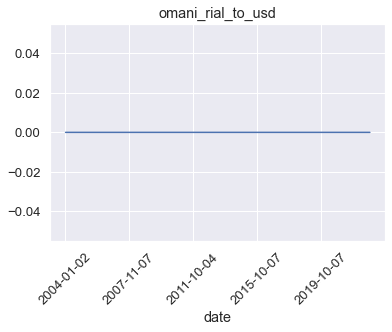

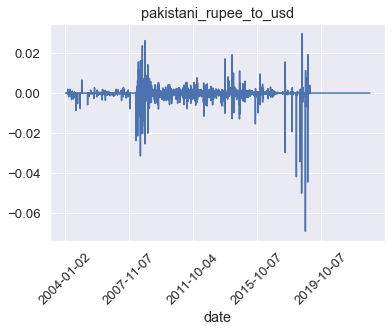

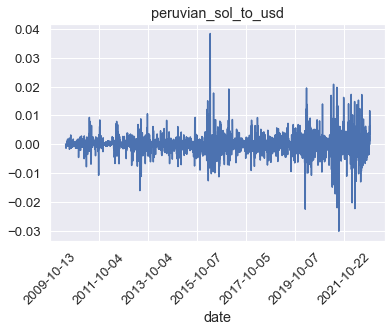

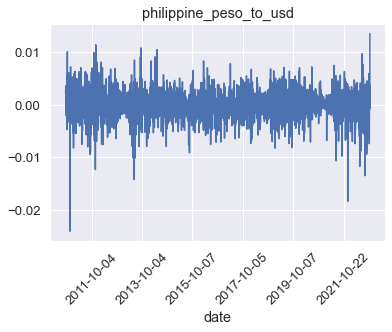

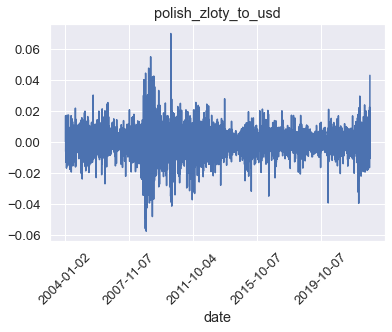

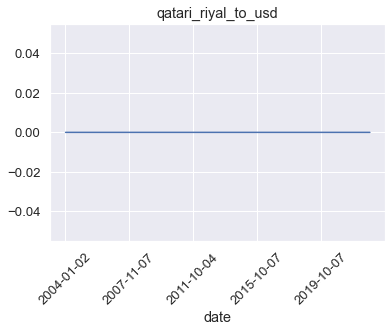

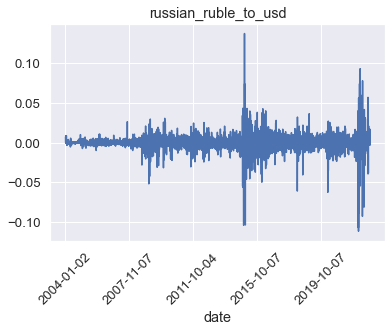

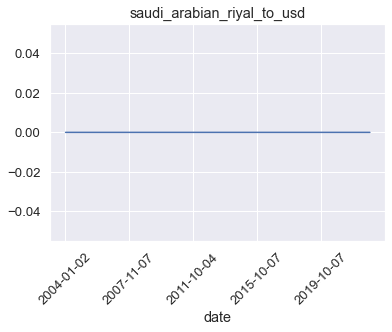

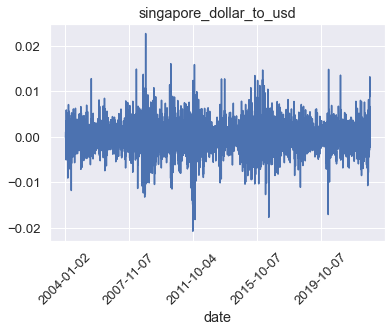

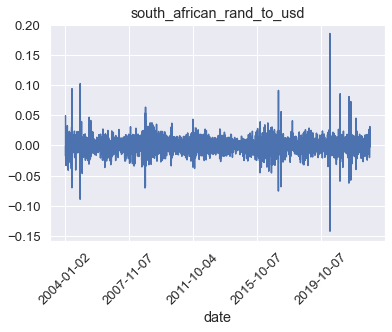

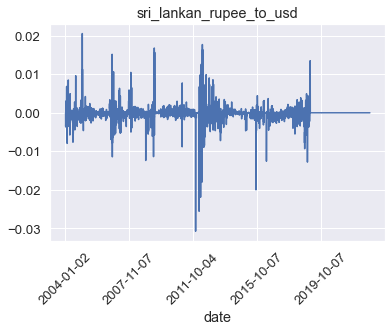

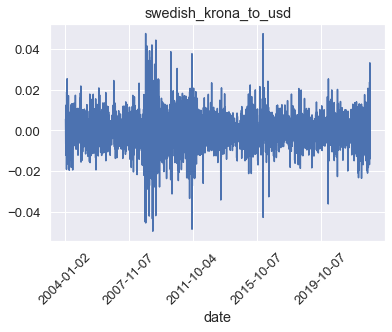

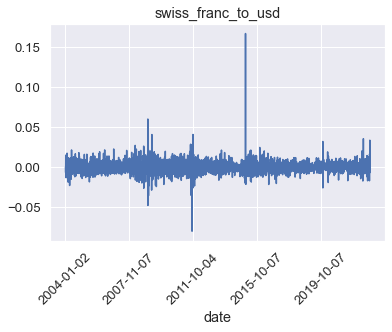

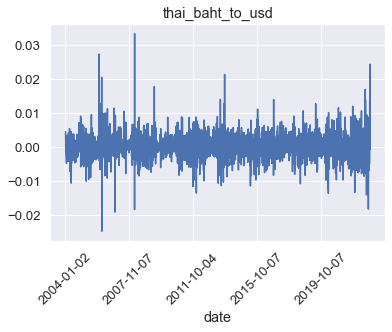

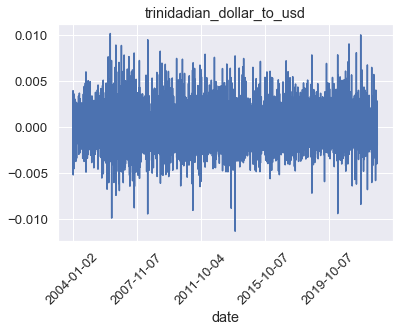

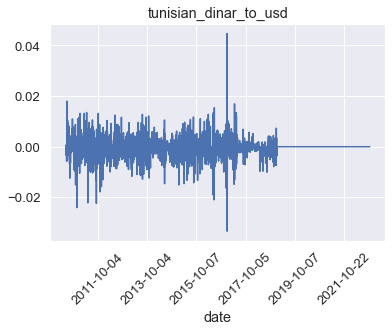

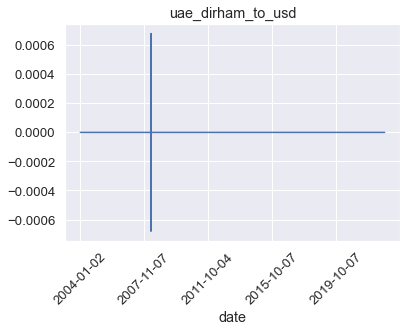

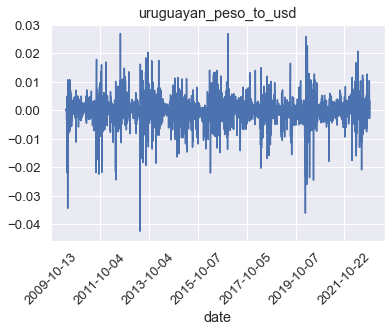

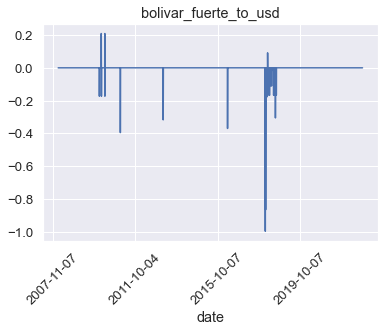

In [7]:
df_returns=df.pct_change(1)
for i in range(1,len(df_returns.columns)):
    ex_rate=df_returns.iloc[:,i]
    ex_rate.plot(title=df_returns.columns[i])
    #Rotate xticks (Dates) 45 degrees
    plt.xticks(rotation=45)
    plt.show()

Now, let´s get the correlation matrix for the daily returns of the currencies exchange rates

C:\Users\Mua\AppData\Local\Temp/ipykernel_15468/4248955765.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

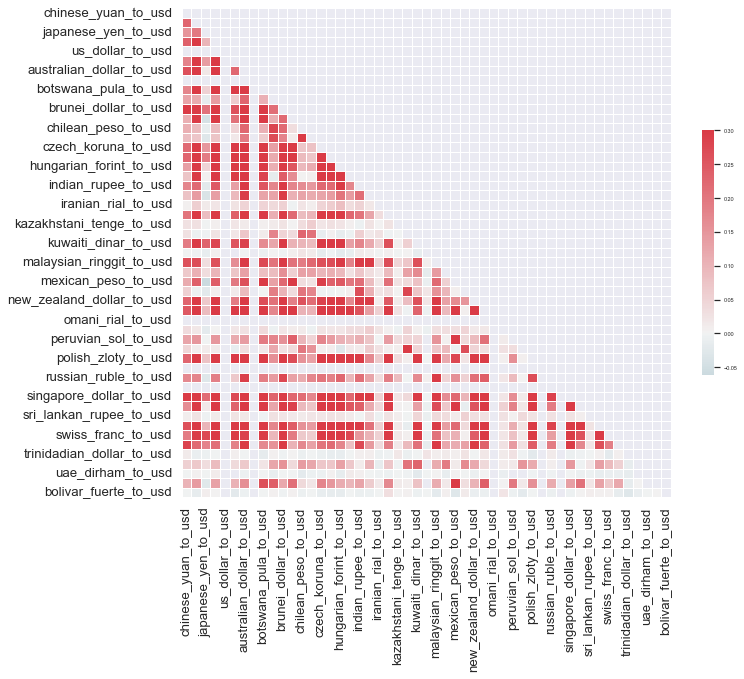

In [8]:
# Compute the correlation matrix
corr=df_returns.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=0.5)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Danish Krone and EuroUSD seem to have a really strong negative correlation.Let´s take them and create a scatter plot with its regression line

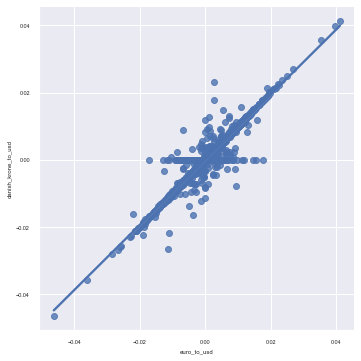

In [9]:
sns.lmplot(x='euro_to_usd',y='danish_krone_to_usd',data=df_returns)

Effectively, the show a really strong correlation, and therefore we could think in an investment estrategy based on this correlation. We could try to predict the returns of one of the exchange rates based on the returns of the other one

Let's analize just the colombian peso, because we are not sure about what do all of the exchange rates mean. Then, let´s plot the Colombian Peso exchange rate and then transform it to how many colombian peso unit are necessary to buy one US Dollar (We are going to continue the analysis with this interpretation of the exchange rate), and then plot it again, with its daily returns (daily percentage variation).

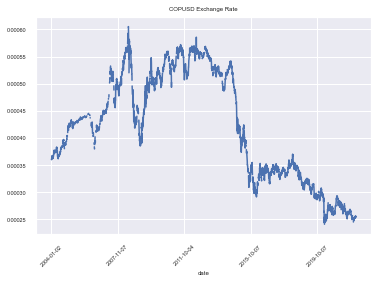

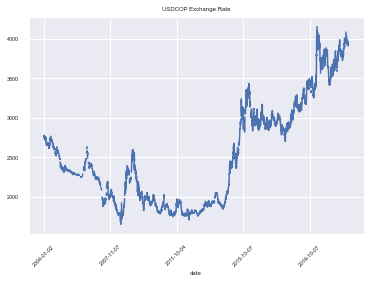

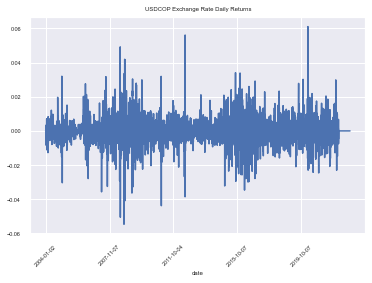

In [10]:
Colombia=df["colombian_peso_to_usd"]
Colombia.plot(title='COPUSD Exchange Rate')
#Rotate xticks (Dates) 45 degrees
plt.xticks(rotation=45)
plt.show()
Colombia=1/Colombia
Colombia.plot(title='USDCOP Exchange Rate')
#Rotate xticks (Dates) 45 degrees
plt.xticks(rotation=45)
plt.show()
#Now plot the daily returns
Colombia_returns=Colombia.pct_change(1)
Colombia_returns.plot(title='USDCOP Exchange Rate Daily Returns')
#Rotate xticks (Dates) 45 degrees
plt.xticks(rotation=45)
plt.show()

As you can see the USDCOP Exchange Rate Daily Returns series seem to has a constan mean along the time (Probably not constant, but at least around 0, it could be modeled with an ARMA model), but the variance along the time series seems to have some specific clusters of higher volatility, for example, it can be seen from the daily returns plot that in 2007 the Colombian Peso gained value against the US Dollar because of the subrpime crisis in United States.

C:\Users\Mua\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


9.838138782897928e-05

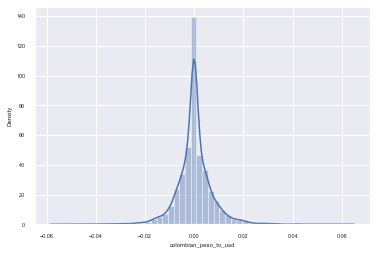

In [11]:
sns.distplot( Colombia_returns)
np.mean(Colombia_returns)

We can see that the mean seems to be 0, but it is actually higher and therefore in the long run the colombian currency have devalued